# Streaming

## Methods: .stream and astream()

- These methods are sync and async methods for streaming back results.

Additional parameters in streaming modes for graph state

- values : This streams the full state of the graph after each node is called. right from the beginning everything is displayed
- updates : This streams updates to the state of the graph after each node is called. only the updated memory shown

In [1]:
from langgraph.graph import add_messages
from typing_extensions import TypedDict
from typing import Annotated

class State(TypedDict):
    messages: Annotated[list, add_messages]

In [2]:
from langchain.chat_models import init_chat_model

llm = init_chat_model('groq:openai/gpt-oss-20b')

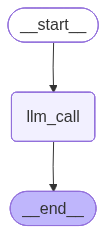

In [3]:
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.checkpoint.memory import MemorySaver

memory = MemorySaver()

def call_llm(state: State):
    return {'messages':llm.invoke(state['messages'])}

builder = StateGraph(State)

builder.add_node('llm_call', call_llm)
builder.add_edge(START, 'llm_call')
builder.add_edge('llm_call', END)

graph = builder.compile(checkpointer=memory)

from IPython.display import Image, display

display(Image(graph.get_graph().draw_mermaid_png()))

In [4]:
## Invocation

config = {"configurable": {"thread_id": "1"}}

graph.invoke({'messages':'Hi my name is Snehanco and I love football'}, config=config)

{'messages': [HumanMessage(content='Hi my name is Snehanco and I love football', additional_kwargs={}, response_metadata={}, id='bceb5373-c72f-48e9-8784-c364ae7d1f07'),
  AIMessage(content='Hey Snehanco! 👋 It’s great to meet a fellow football fan. What’s your favorite team, and which league do you usually follow? Are you more into the Premier League, La Liga, Serie A, or maybe the MLS? If you’re into the World Cup or any other tournaments, I’d love to hear about your predictions too! ⚽️', additional_kwargs={'reasoning_content': 'We need to respond friendly, mention football. Probably ask about favorite team, etc.'}, response_metadata={'token_usage': {'completion_tokens': 102, 'prompt_tokens': 82, 'total_tokens': 184, 'completion_time': 0.108661398, 'prompt_time': 0.009339349, 'queue_time': 0.046822111, 'total_time': 0.118000747, 'completion_tokens_details': {'reasoning_tokens': 18}}, 'model_name': 'openai/gpt-oss-20b', 'system_fingerprint': 'fp_e99e93f2ac', 'service_tier': 'on_demand',

In [5]:
## Streaming the Responses with Stream Method

config = {"configurable": {"thread_id": "3"}}

for chunk in graph.stream({'messages': 'Hi, My name is Surya and I love cricket'}, config, stream_mode='updates'):
    print(chunk)

{'llm_call': {'messages': AIMessage(content='Hey Surya! 👋 It’s great to meet another cricket fan. 🎉\n\nWhat’s your favourite part of the game? Are you more into the fast-paced T20s, the strategic depth of Tests, or the sheer excitement of ODIs? Maybe you’ve got a favorite player or a memorable match that still gets your heart racing? I’d love to hear about it!', additional_kwargs={'reasoning_content': 'User says "Hi, My name is Surya and I love cricket". We need to respond appropriately, maybe ask about cricket, share something. There\'s no explicit instruction. We can respond with a friendly greeting, maybe ask what aspects of cricket they like, or share a fun fact. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 82, 'total_tokens': 231, 'completion_time': 0.163282042, 'prompt_time': 0.009343139, 'queue_time': 0.047254911, 'total_time': 0.172625181, 'completion_tokens_details': {'reasoning_tokens': 62}}, 'model_name': 'openai/gpt-oss-

In [6]:
for chunk in graph.stream({'messages': 'Hi, My name is Surya and I love the sun'}, config, stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Surya and I love cricket', additional_kwargs={}, response_metadata={}, id='77fb1632-9ce4-4500-ade6-4798b4f10456'), AIMessage(content='Hey Surya! 👋 It’s great to meet another cricket fan. 🎉\n\nWhat’s your favourite part of the game? Are you more into the fast-paced T20s, the strategic depth of Tests, or the sheer excitement of ODIs? Maybe you’ve got a favorite player or a memorable match that still gets your heart racing? I’d love to hear about it!', additional_kwargs={'reasoning_content': 'User says "Hi, My name is Surya and I love cricket". We need to respond appropriately, maybe ask about cricket, share something. There\'s no explicit instruction. We can respond with a friendly greeting, maybe ask what aspects of cricket they like, or share a fun fact. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 82, 'total_tokens': 231, 'completion_time': 0.163282042, 'prompt_time': 0.009343139, 

In [7]:
for chunk in graph.stream({'messages': 'I also like the moon'}, config, stream_mode='updates'):
    print(chunk)

{'llm_call': {'messages': AIMessage(content='That’s a lovely combo—sun and moon! 🌞🌙\n\nWhat draws you to them? Maybe the way the sun lights up a day, the warmth it gives, or its science (solar flares, energy, the whole solar system dance). And for the moon—do you enjoy watching its phases, the lunar eclipses, or the quiet beauty of a full‑moon night? If you’re into astronomy, there’s a ton to explore: from the Moon’s geology to the way the Sun’s activity influences Earth. Let me know what sparks your interest, and we can dive into it!', additional_kwargs={'reasoning_content': 'User says "I also like the moon". The user is likely expressing interest in both sun and moon. The user may want to talk about them. There\'s no conflict. The user hasn\'t asked a question. The user might be wanting to chat. The user hasn\'t provided any conflict or disallowed content. There\'s no request for disallowed content. So we can comply. We can respond with a friendly chat about the sun and moon. We shou

In [8]:
for chunk in graph.stream({'messages': 'I love the sky'}, config, stream_mode='values'):
    print(chunk)

{'messages': [HumanMessage(content='Hi, My name is Surya and I love cricket', additional_kwargs={}, response_metadata={}, id='77fb1632-9ce4-4500-ade6-4798b4f10456'), AIMessage(content='Hey Surya! 👋 It’s great to meet another cricket fan. 🎉\n\nWhat’s your favourite part of the game? Are you more into the fast-paced T20s, the strategic depth of Tests, or the sheer excitement of ODIs? Maybe you’ve got a favorite player or a memorable match that still gets your heart racing? I’d love to hear about it!', additional_kwargs={'reasoning_content': 'User says "Hi, My name is Surya and I love cricket". We need to respond appropriately, maybe ask about cricket, share something. There\'s no explicit instruction. We can respond with a friendly greeting, maybe ask what aspects of cricket they like, or share a fun fact. No policy issues.'}, response_metadata={'token_usage': {'completion_tokens': 149, 'prompt_tokens': 82, 'total_tokens': 231, 'completion_time': 0.163282042, 'prompt_time': 0.009343139, 

## Streaming with Astream method

Streaming tokens We often want to stream more than graph state.

In particular, with chat model calls it is common to stream the tokens as they are generated

We can do this using the .astream_events method, which streams back events as they happen inside nodes!

We can do this using .astream_events method, which streams back events as they happen inside nodes!

Each event is a dict with a few keys:

- event: This is the type of event that is being emitted.
- name: This is the name of the event.
- data: This is the data associated with the event.
- metadata: Contains langgraph_node, the node emitting the event.

In [9]:
config = {"configurable": {"thread_id": "4"}}

async for events in graph.astream_events({'messages': 'Hi, My name is Snehanco and I love to watch football'}, config, version='v2'):
    print(events)


{'event': 'on_chain_start', 'data': {'input': {'messages': 'Hi, My name is Snehanco and I love to watch football'}}, 'name': 'LangGraph', 'tags': [], 'run_id': '44f1e758-0c09-4b1d-b3c5-53ed2a279084', 'metadata': {'thread_id': '4'}, 'parent_ids': []}
{'event': 'on_chain_start', 'data': {'input': {'messages': [HumanMessage(content='Hi, My name is Snehanco and I love to watch football', additional_kwargs={}, response_metadata={}, id='98878777-da31-4774-ba83-4130e674a173')]}}, 'name': 'llm_call', 'tags': ['graph:step:1'], 'run_id': '94accf40-fe4c-4309-bbeb-35eb3b59f9e5', 'metadata': {'thread_id': '4', 'langgraph_step': 1, 'langgraph_node': 'llm_call', 'langgraph_triggers': ('branch:to:llm_call',), 'langgraph_path': ('__pregel_pull', 'llm_call'), 'langgraph_checkpoint_ns': 'llm_call:9ca93dc1-c45c-b43d-7f6f-1a5e1228aac0'}, 'parent_ids': ['44f1e758-0c09-4b1d-b3c5-53ed2a279084']}
{'event': 'on_chat_model_start', 'data': {'input': {'messages': [[HumanMessage(content='Hi, My name is Snehanco and